# installs to work geoSpatial

In [ ]:
# pip installs 

#!conda install geopandas
#pip install descartes

## Data Notes

In [ ]:
"""
    uses the data folder called clean data, which has:
        - firehouse data set
        - clean crash dataset with 5_000 rows
        

"""

### Imports

In [6]:
import geopandas as gpd

from descartes import PolygonPatch

import matplotlib as plt
import pandas as pd

### Boroughs map

In [8]:
# borough map of NYC 

boroughs = gpd.read_file("../crash_dummies/borough_boundaries/geo_export_1639c8e3-ee35-430b-a46f-af624b68052e.shp")


In [64]:
boroughs.head(2)

,boro_code,boro_name,shape_area,shape_leng,geometry
0,2.0,Bronx,1.186613e+09,462958.559564,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
1,5.0,Staten Island,1.623757e+09,325956.009000,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [22]:
print(boroughs.crs)

{'init': 'epsg:4326'}


---

### Fire House ploting 

In [34]:
df_firehouse = pd.read_csv('../crash_dummies/clean_data/FDNY_Firehouse_Listing.csv')

In [35]:
df_firehouse.head(1)

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005.0,40.703466,-74.007538,1.0,1.0,7.0,1000867.0,1.000350e+09,Battery Park City-Lower Manhattan ...


In [36]:
# creates geo data for crash data

gdf_firehouse = gpd.GeoDataFrame(
                df_firehouse, geometry=gpd.points_from_xy(df_firehouse.Longitude, df_firehouse.Latitude))

In [38]:
df_firehouse.head(1)

,FacilityName,FacilityAddress,Borough,Postcode,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,geometry
0,Engine 4/Ladder 15,42 South Street,Manhattan,10005.0,40.703466,-74.007538,1.0,1.0,7.0,1000867.0,1.000350e+09,Battery Park City-Lower Manhattan ...,POINT (-74.00754 40.70347)


In [41]:
gdf_firehouse.crs = {'init': 'epsg:4326'}

---

### Crash Data

In [24]:
# cleaned data set
df = pd.read_csv('../crash_dummies/clean_data/crash_features_2018.csv')

In [25]:
df.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,08/29/2013,9:30,QUEENS,11373.0,40.734415,-73.876361,"(40.7344151, -73.8763611)",55 ROAD,SEABURY STREET,NaN,...,Unspecified,NaN,NaN,NaN,257950,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [26]:
# creates geo data for crash data

gdf_crash = gpd.GeoDataFrame(
                df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [27]:
gdf_crash.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
0,08/29/2013,9:30,QUEENS,11373.0,40.734415,-73.876361,"(40.7344151, -73.8763611)",55 ROAD,SEABURY STREET,NaN,...,NaN,NaN,NaN,257950,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,POINT (-73.87636 40.73442)


In [28]:
gdf_crash.crs = {'init': 'epsg:4326'}

---

# Map 1.0

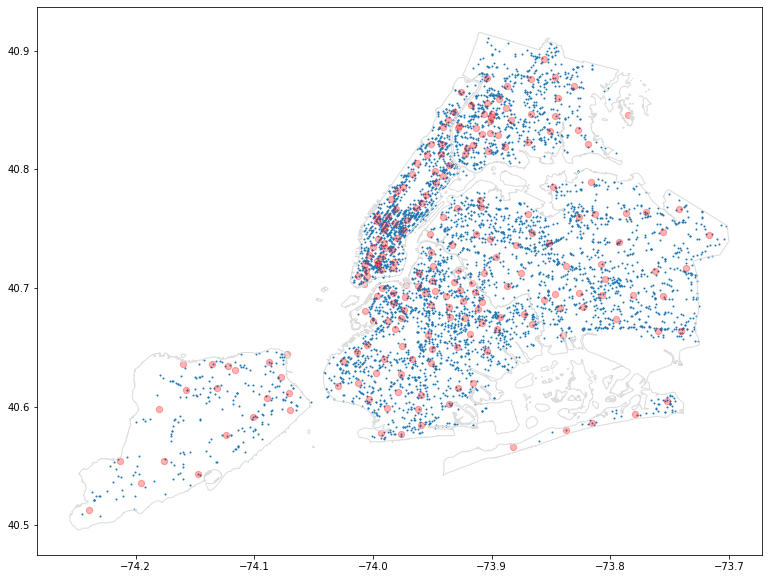

In [62]:
"""
    blue dots is all 5000 data points for test, but we can do different colors as 
        group bys 
    Red dots is firehouse
    

"""
gdf_crash.crs = {'init': 'epsg:4326'}
ax = boroughs.plot(figsize=(13,13), color='none', edgecolor='gainsboro', zorder=3)




gdf_crash.to_crs(epsg=4326).plot(markersize=1, ax=ax)
gdf_firehouse.to_crs(epsg=4326).plot(markersize=40, 
                                     color = 'red',
                                     alpha = .3,
                                     ax=ax);

